In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_file_v0_filtered', 
                 compression = "zip", header = 0, index_col = 0, sep = "\t")

In [4]:
data = df.drop("CANCER_TYPE", axis = 1)
labels = df["CANCER_TYPE"]

In [5]:
print(labels.unique(), len(labels.unique()))

['Glioma' 'Leukemia' 'Thyroid Cancer' 'Hepatobiliary Cancer'
 'Mature B-Cell Neoplasms' 'Non-Small Cell Lung Cancer'
 'Soft Tissue Sarcoma' 'Pancreatic Cancer' 'Head and Neck Cancer'
 'Esophagogastric Cancer' 'Melanoma' 'Breast Cancer' 'Endometrial Cancer'
 'Colorectal Cancer' 'Prostate Cancer' 'Renal Cell Carcinoma'
 'Bladder Cancer' 'Ovarian Cancer'] 18


In [6]:
encoder = preprocessing.LabelEncoder()
classes = encoder.fit_transform(labels)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
									data, classes, 
									test_size = 0.2, 
									random_state = 0) 

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(78067,)
(78067, 1345)
(19517,)
(19517, 1345)


In [8]:
learning_rate = 0.1
opt = 'ADAM'
size_batch = 256
nb_epochs = 50

In [16]:
#2nd try: modified the loss function which is more adapted for classification

model = Sequential()	
	
model.add(	
	Dense(64, input_dim = len(data.columns), activation = 'relu'))

model.add(	
	Dense(32, activation = 'relu'))

model.add(	
	Dense(16, activation = 'relu'))
	
model.add(	
	Dense(len(labels.unique()), activation = 'softmax'))
	
model.compile(optimizer = opt,	
						loss = 'sparse_categorical_crossentropy',	
						metrics = ["accuracy"])	

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                86144     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 18)                306       
                                                                 
Total params: 89,058
Trainable params: 89,058
Non-trainable params: 0
_________________________________________________________________


In [18]:
es = EarlyStopping(
  monitor = 'val_accuracy', mode = 'max', 
	verbose = 1, patience = 30)

In [19]:
class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_d = {l:c for l,c in zip(np.unique(y_train), class_weights)}

In [20]:
print(class_weights_d)

{0: 1.6610706838588876, 1: 0.40367233391246793, 2: 0.4585594793355419, 3: 1.467204179822583, 4: 1.585760715011172, 5: 0.7312519904831488, 6: 3.0139371477106014, 7: 2.150250647275932, 8: 1.5472906013398342, 9: 2.040967320261438, 10: 1.1041383797239195, 11: 0.30139371477106014, 12: 1.1937945377251735, 13: 1.09771084676172, 14: 1.255661712668082, 15: 2.73804012345679, 16: 1.4832611339109287, 17: 3.1337106615285806}


In [21]:
history = model.fit(
	x_train, y_train, 
	validation_data = (x_test, y_test), 
	batch_size = size_batch, 
  epochs = nb_epochs, 
  class_weight = class_weights_d,
	verbose = 1, callbacks = [es])

Epoch 1/50
305/305 [==============================] - 3s 9ms/step - loss: 2.3830 - accuracy: 0.3373 - val_loss: 1.9282 - val_accuracy: 0.4497
Epoch 2/50
305/305 [==============================] - 2s 8ms/step - loss: 1.8886 - accuracy: 0.4607 - val_loss: 1.8313 - val_accuracy: 0.4656
Epoch 3/50
305/305 [==============================] - 2s 8ms/step - loss: 1.7890 - accuracy: 0.4768 - val_loss: 1.8290 - val_accuracy: 0.4638
Epoch 4/50
305/305 [==============================] - 2s 8ms/step - loss: 1.7285 - accuracy: 0.4862 - val_loss: 1.7917 - val_accuracy: 0.4735
Epoch 5/50
305/305 [==============================] - 2s 8ms/step - loss: 1.6841 - accuracy: 0.4947 - val_loss: 1.7668 - val_accuracy: 0.4760
Epoch 6/50
305/305 [==============================] - 2s 8ms/step - loss: 1.6478 - accuracy: 0.5041 - val_loss: 1.7758 - val_accuracy: 0.4739
Epoch 7/50
305/305 [==============================] - 2s 8ms/step - loss: 1.6172 - accuracy: 0.5104 - val_loss: 1.7385 - val_accuracy: 0.4827
Epoch 

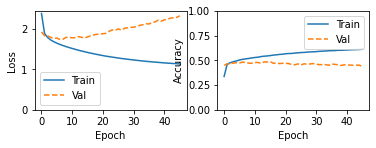

In [22]:
metrics = ['loss', 'accuracy']
for n, metric in enumerate(metrics):
  name = metric.replace("_"," ").capitalize()
  plt.subplot(2,2,n+1)
  plt.plot(history.epoch, history.history[metric],  label='Train')
  plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  if metric == 'loss':
    plt.ylim([0, plt.ylim()[1]])
  elif metric == 'auc':
    plt.ylim([0.8,1])
  else:
    plt.ylim([0,1])

  plt.legend()

